In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [ ]:

data = pd.read_csv("House Price.csv") 
data.shape


(1460, 81)

In [ ]:
print(data.head())


   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [ ]:

data['Neighborhood'].describe() 


count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

In [ ]:
data['LandContour'].unique() 


array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [ ]:
data['SalePrice'].describe() 


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

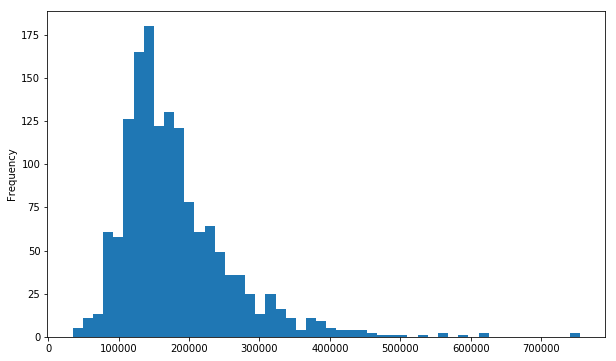

In [ ]:

plt.figure(figsize = (10, 6)) 
data['SalePrice'].plot(kind ="hist", bins=50) 
#data['Neighborhood'].value_counts()
#data['LandContour'].value_counts().plot(kind='bar')

#data['SalePrice'].plot(kind ="box") 
#data['Neighborhood'].plot(kind ="bar") 


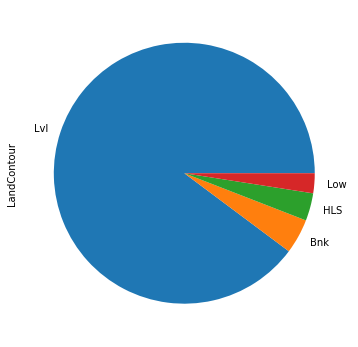

In [ ]:
plt.figure(figsize = (10, 6)) 
data['LandContour'].value_counts().plot(kind='pie')


In [ ]:
corrmat = data.corr() 
print(corrmat)
#f, ax = plt.subplots(figsize =(14, 10)) 
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)  



                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

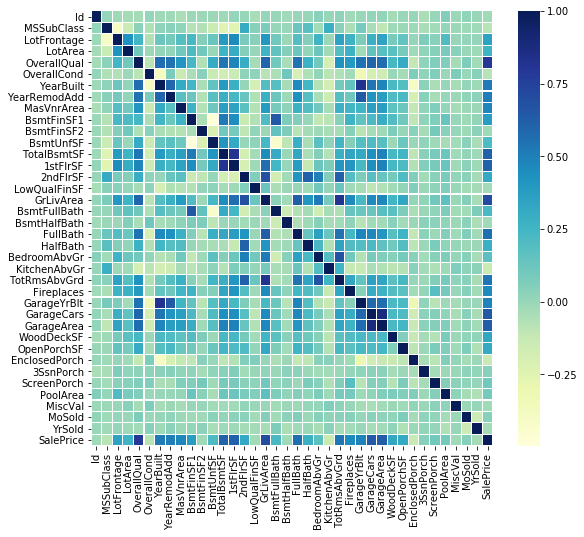

In [ ]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

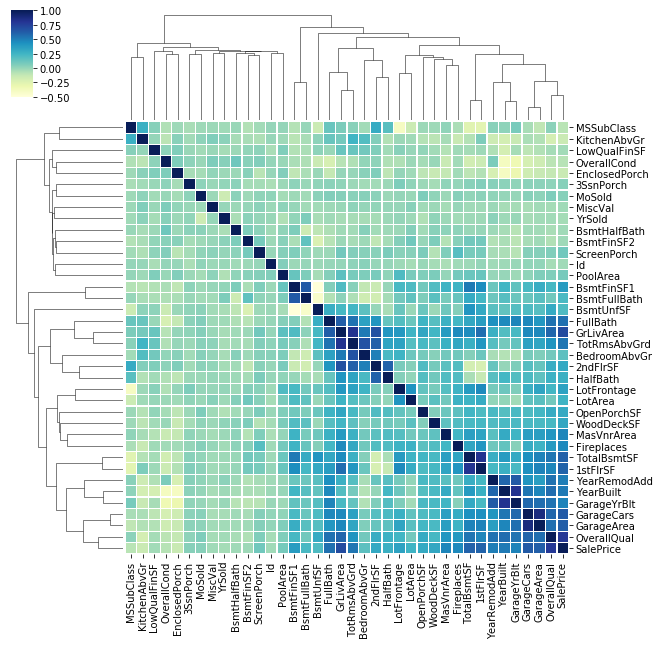

In [ ]:

corrmat = data.corr() 

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 


[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733 0.50710097        nan
         nan 0.46692884 0.38641981]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277 0.55068392        nan
         nan 0.39676504 0.23966597]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971 0.28738852        nan
         nan 0.46167913 0.20817113]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009 0.42062215        nan
         nan 0.30078877 0.22405352]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382 0.37159981        nan
         nan 0.26914124 0.29697039]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452   0.29106558        nan
         nan 0

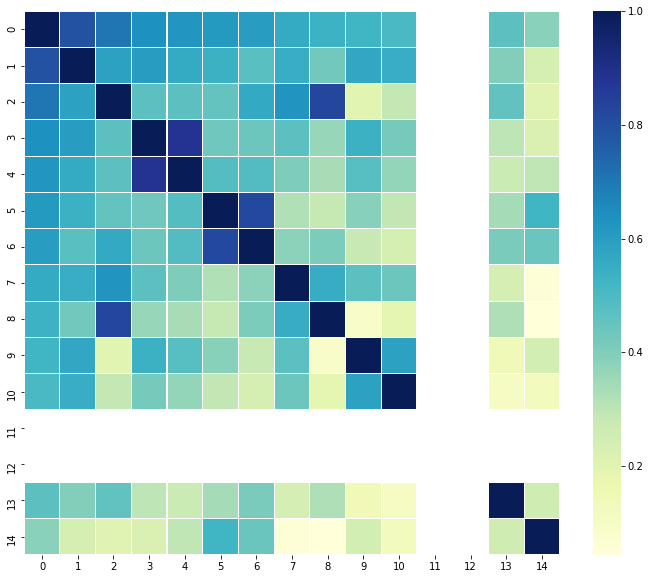

In [ ]:

# saleprice correlation matrix 
# k : number of variables for heatmap 
k = 15 
  
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
#print(cols)
cm = np.corrcoef(data[cols].values.T)
print(cm) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1) 
#, yticklabels = cols.values,  
#                              xticklabels = cols.values